In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as profiling
import seaborn as sns

c:\ProgramData\miniforge3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\ProgramData\miniforge3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=np.array(df.columns[2:]), inplace=True)

In [7]:
df.sample(8)

,v1,v2
2979,ham,What u mean u almost done? Done wif sleeping? ...
4584,spam,U have a Secret Admirer who is looking 2 make ...
1144,ham,Really... I tot ur paper ended long ago... But...
1525,ham,Pls pls find out from aunt nike.
85,ham,"I call you later, don't have network. If urgnt..."
2871,ham,See you there!
86,ham,For real when u getting on yo? I only need 2 m...
1081,ham,Can u get pic msgs to your phone?


In [8]:
df.rename(columns={"v1":"target","v2":"text"}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
codes = encoder.fit_transform(df['target'])
codes

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target'] = codes

In [12]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep="first", inplace=True)

In [16]:
df.sample(10)

,target,text
380,0,I guess that's why you re worried. You must kn...
3631,0,Oooh I got plenty of those!
3212,0,What's ur pin?
2165,0,I'm not coming home 4 dinner.
118,0,Hmm...my uncle just informed me that he's payi...
4611,0,Sorry da. I gone mad so many pending works wha...
4326,0,Dude got a haircut. Now its breezy up there
2168,0,Thx. All will be well in a few months
2911,0,You didn't have to tell me that...now i'm thin...
4375,1,"If you don't, your prize will go to another cu..."


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

### 2. EDA
##### To understand the Data

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

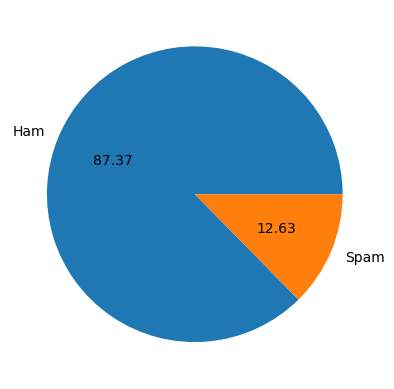

In [20]:
plt.pie(df['target'].value_counts(), labels=["Ham","Spam"], autopct="%1.2f")
plt.show()

So, imbalanced dataset

In [21]:
import nltk
# nltk.download('punkt')

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
df.describe()


,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


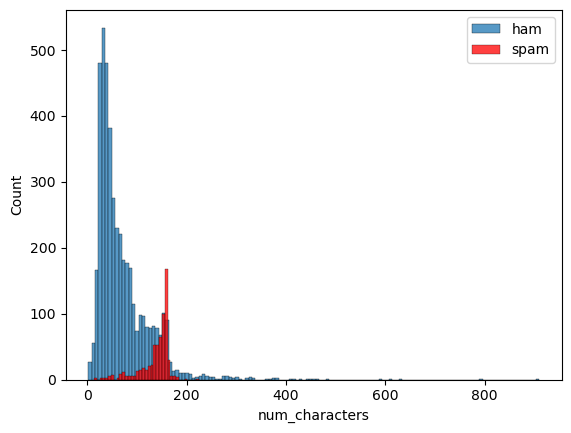

In [29]:
sns.histplot(df[df['target']==0]['num_characters'], label="ham")
sns.histplot(df[df['target']==1]['num_characters'], color='red', label="spam")
plt.legend()
plt.show()

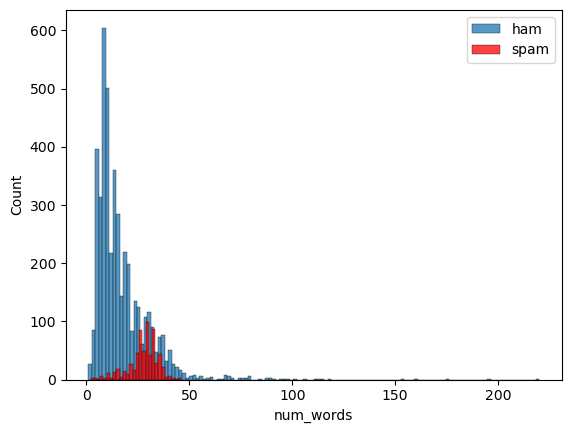

In [30]:
sns.histplot(df[df['target']==0]['num_words'], label="ham")
sns.histplot(df[df['target']==1]['num_words'], color='red', label="spam")
plt.legend()
plt.show()

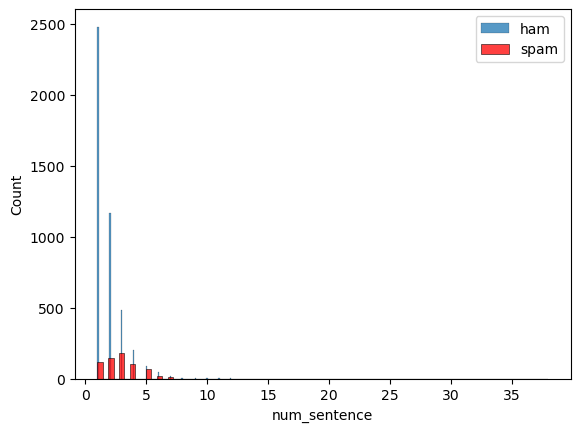

In [31]:
sns.histplot(df[df['target']==0]['num_sentence'], label="ham")
sns.histplot(df[df['target']==1]['num_sentence'], color='red', label="spam")
plt.legend()
plt.show()

c:\ProgramData\miniforge3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


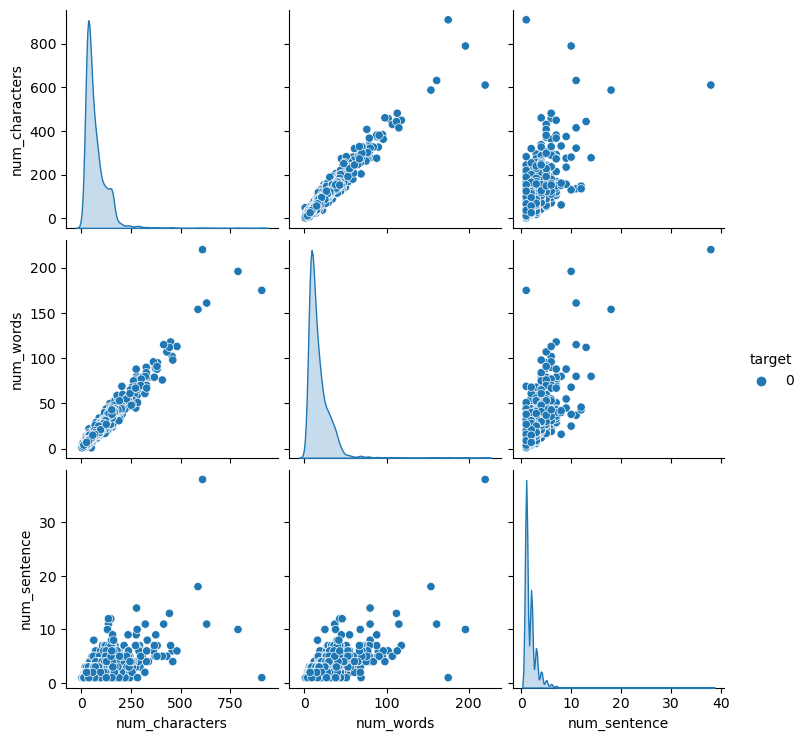

In [32]:
sns.pairplot(df[df['target']==0], hue = 'target')
plt.show()

c:\ProgramData\miniforge3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


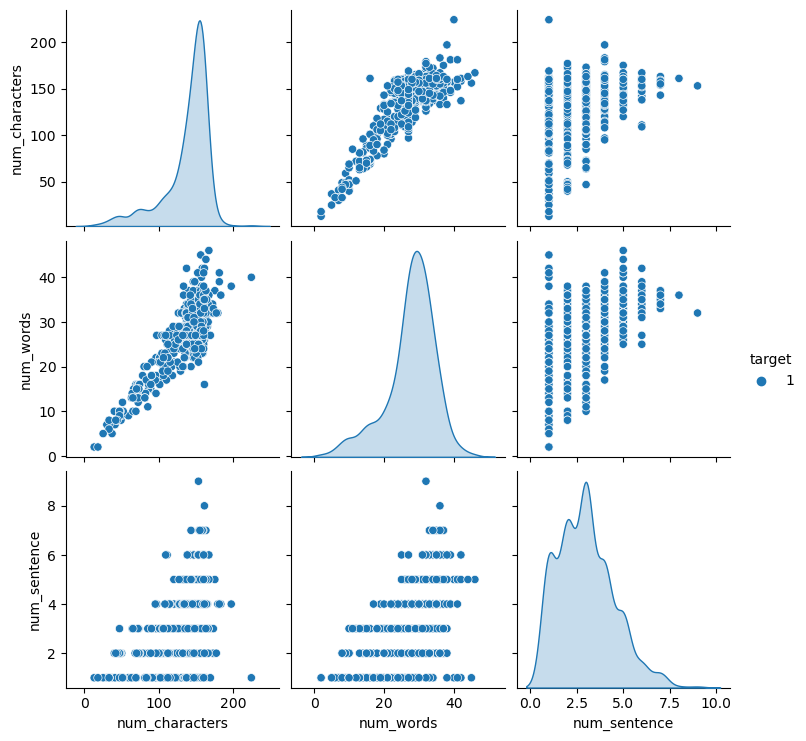

In [33]:
sns.pairplot(df[df['target']==1], hue = 'target')
plt.show()

In [34]:
numeric_col = [x for x in df.columns if df[x].dtype != 'O']

<Axes: >

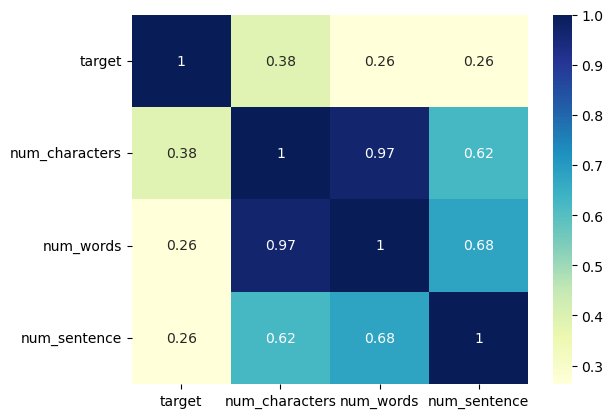

In [35]:
sns.heatmap(df[numeric_col].corr(), cmap="YlGnBu", annot=True)

No. of words and no. of characters are highly correlated. Also nu. of sentences are high correlated. So we need only one feature for model building. We will use no. of characters.

### 3. Data Preprocessing

What we will do in this is:
* Converting data into lower case.
* Tokenizing (breaking into words)
* Removing special characters like & # etc.,  stop words like the, is, it etc. that are only used in sentence building and not has special meaning and punctuations.
* stemming or lemmatization (in which we convert similar words like dance, dancing and dances into single word dance).

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def transform_text(text):
    # tokenize the text
    text = nltk.word_tokenize(text)
    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i.lower())
    text = y[:]
    y.clear()
    # removing stop words and punctuation
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    # stemming        
    from nltk.stem.snowball import SnowballStemmer
    ps = SnowballStemmer(language = 'english')
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [40]:
# making wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size =15, background_color = 'white')

In [41]:
spam_corpus = df[df['target'] == 1]['transformed_text'].str.cat(sep = " ").split(" ")
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',


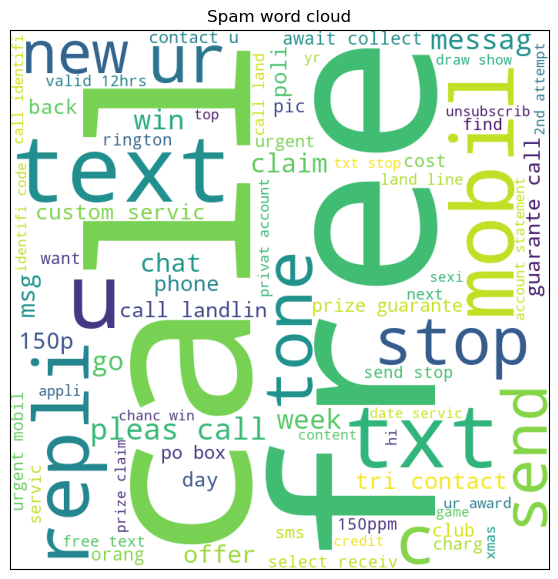

In [42]:
plt.figure(figsize = (7,7))
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.title("Spam word cloud")
plt.imshow(spam_wc)

In [43]:
ham_corpus = df[df['target'] == 0]['transformed_text'].str.cat(sep = " ").split(" ")

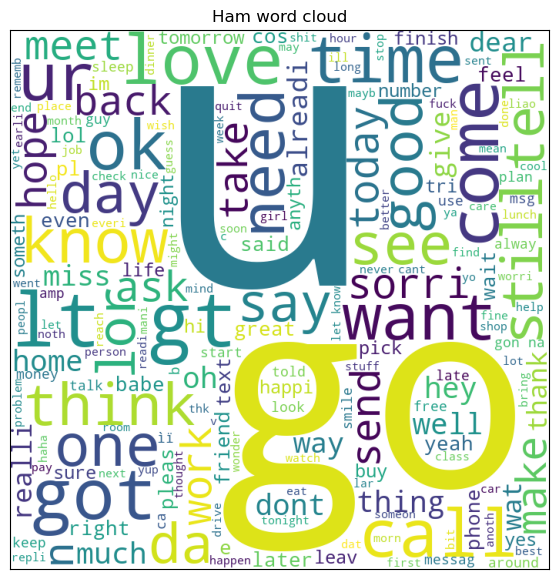

In [44]:
plt.figure(figsize = (7,7))
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.title("Ham word cloud")
plt.imshow(ham_wc)

In [45]:
# common words
tuple(set(spam_corpus) & set(ham_corpus))

('becom',
 '8pm',
 'xmas',
 'child',
 'straight',
 'drop',
 'link',
 'luv',
 'hous',
 'xxxx',
 'pass',
 'forget',
 'key',
 'day',
 'four',
 'great',
 'match',
 'popcorn',
 'kinda',
 'crazi',
 '26th',
 'break',
 'r',
 'select',
 '8',
 'meet',
 'wrote',
 'set',
 'fone',
 'career',
 '2moro',
 'gettin',
 'promot',
 'respons',
 'zoe',
 'provid',
 '2morow',
 'woman',
 'card',
 'buy',
 'birthday',
 'reveal',
 'landlin',
 'lot',
 'cam',
 'servic',
 'charg',
 'worth',
 'cross',
 'person',
 'creat',
 'sender',
 'congrat',
 '50',
 'b',
 'sing',
 'st',
 'cute',
 'eng',
 '2nd',
 'photo',
 'e',
 'u',
 'load',
 'trip',
 'week',
 'local',
 'iscom',
 'del',
 'deck',
 'detroit',
 'wife',
 'airport',
 'anim',
 'could',
 'suffici',
 'messag',
 'tb',
 'current',
 'right',
 'jane',
 'comp',
 'dark',
 'season',
 '3',
 'paid',
 'notic',
 'bid',
 'hrs',
 'b4',
 'keep',
 'way',
 'voucher',
 'harri',
 'wo',
 'hurri',
 'nake',
 'tomorrow',
 'thousand',
 'away',
 'import',
 'open',
 'feel',
 'nasti',
 'scotland',


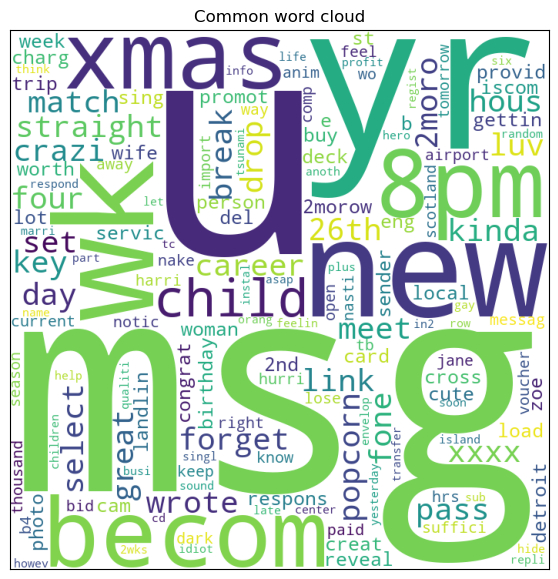

In [46]:
plt.figure(figsize=(7,7))
common_wc = wc.generate(pd.Series(tuple(set(spam_corpus) & set(ham_corpus))).str.cat(sep = " "))
plt.imshow(common_wc)
plt.tick_params(left = False, right = False, bottom = False, labelbottom = False, labelleft = False)
plt.title("Common word cloud")
plt.show()

In [47]:
# spam words with count
spam_corpus = df[df['target'] == 1]['transformed_text'].str.cat(sep = " ").split(" ")

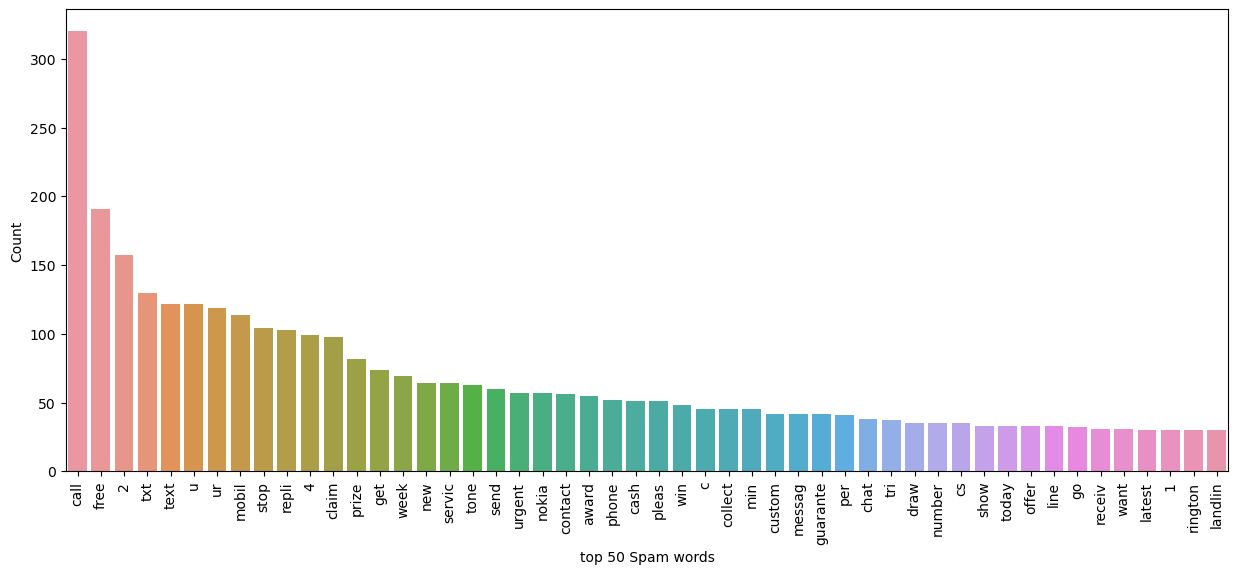

In [48]:
# top 50 spam words
plt.figure(figsize= (15,6))
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(50))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel("top 50 Spam words")
plt.ylabel("Count")
plt.show()

In [49]:
# ham words with count
ham_corpus = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ").split(" ")
print(ham_corpus)
print(len(ham_corpus))


['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'yes', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha',

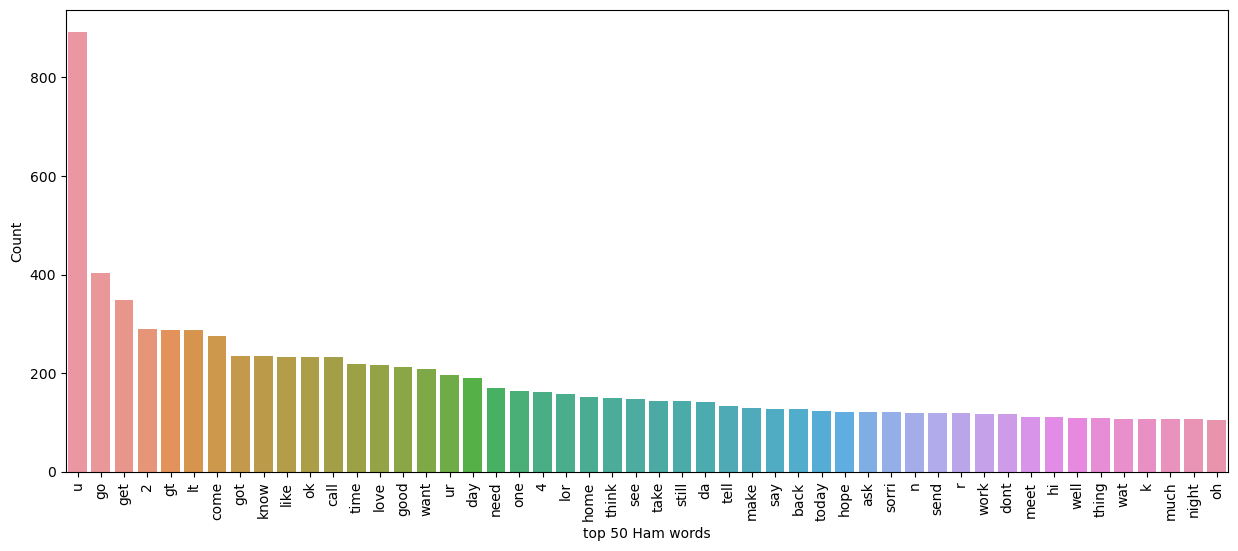

In [50]:
# top 50 ham words
plt.figure(figsize= (15,6))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(50))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel("top 50 Ham words")
plt.ylabel("Count")
plt.show()

### 4. Model Building


#### We will start from Naive bayes as it is considered good for classification

In [51]:
# first converting the transformed_text into vectors so that machine can process it
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
cv = CountVectorizer()

In [52]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
Y = df['target']

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gb = GaussianNB()
mn = MultinomialNB()
bn = BernoulliNB()

In [56]:
all_models = [gb, mn, bn]

In [57]:
def fit_all(models, xtr, xts, ytr, yts):
    temp = {'model':[], 'accuracy':[], 'precision':[]}
    for i in range(len(models)):
        models[i].fit(xtr, ytr)
        ypred1 = models[i].predict(xts)
        display(models[i].__class__())
        display(accuracy_score(yts, ypred1))
        print("confusion matrix\n", confusion_matrix(yts, ypred1))
        display("precision_score {}".format(precision_score(yts, ypred1)))
        temp['model'].append(str(models[i].__class__())[:str(models[i].__class__()).find("(")])
        temp['accuracy'].append(round(accuracy_score(yts, ypred1),2))
        temp['precision'].append(round(precision_score(yts, ypred1),2))
    return temp


In [58]:
model_score = fit_all(all_models, xtrain, xtest, ytrain, ytest)

GaussianNB()

0.8839458413926499

confusion matrix
 [[793 103]
 [ 17 121]]


'precision_score 0.5401785714285714'

MultinomialNB()

0.9661508704061895

confusion matrix
 [[873  23]
 [ 12 126]]


'precision_score 0.8456375838926175'

BernoulliNB()

0.9709864603481625

confusion matrix
 [[893   3]
 [ 27 111]]


'precision_score 0.9736842105263158'

In [59]:
(pd.DataFrame(model_score)).sort_values('precision')

,model,accuracy,precision
0,GaussianNB,0.88,0.54
1,MultinomialNB,0.97,0.85
2,BernoulliNB,0.97,0.97


BernoulliNB is much better

### Now trying using tf-idf instead of count vectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [61]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
X2.shape

(5169, 6743)

In [63]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y, test_size=0.2)

In [64]:
gb2 = GaussianNB()
mn2 = MultinomialNB()
bn2 = BernoulliNB()
all_models2 = [gb2, mn2, bn2]

In [65]:
model_score2 = fit_all(all_models2, xtrain2, xtest2, ytrain2, ytest2)

GaussianNB()

0.8694390715667312

confusion matrix
 [[798 117]
 [ 18 101]]


'precision_score 0.463302752293578'

MultinomialNB()

0.9642166344294004

confusion matrix
 [[915   0]
 [ 37  82]]


'precision_score 1.0'

BernoulliNB()

0.9758220502901354

confusion matrix
 [[909   6]
 [ 19 100]]


'precision_score 0.9433962264150944'

In [66]:
pd.DataFrame(model_score2).sort_values('precision', ascending=False)

,model,accuracy,precision
1,MultinomialNB,0.96,1.00
2,BernoulliNB,0.98,0.94
0,GaussianNB,0.87,0.46


With tfidf, Multinomial is highly accurate

In [67]:
# checking other algo of classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnc = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [70]:
all_models3 = [svc, knc, mnc, dtc, lrc, rfc, abc, bc, etc, gbdt, xgb]

In [72]:
model_score3 = fit_all(all_models3, xtrain2, xtest2, ytrain2, ytest2)

SVC()

0.9777562862669246

confusion matrix
 [[911   4]
 [ 19 100]]


'precision_score 0.9615384615384616'

KNeighborsClassifier()

0.9052224371373307

confusion matrix
 [[915   0]
 [ 98  21]]


'precision_score 1.0'

MultinomialNB()

0.9642166344294004

confusion matrix
 [[915   0]
 [ 37  82]]


'precision_score 1.0'

DecisionTreeClassifier()

0.941972920696325

confusion matrix
 [[903  12]
 [ 48  71]]


'precision_score 0.8554216867469879'

LogisticRegression()

0.9584139264990329

confusion matrix
 [[908   7]
 [ 36  83]]


'precision_score 0.9222222222222223'

RandomForestClassifier()

0.9787234042553191

confusion matrix
 [[915   0]
 [ 22  97]]


'precision_score 1.0'

AdaBoostClassifier()

0.9748549323017408

confusion matrix
 [[910   5]
 [ 21  98]]


'precision_score 0.9514563106796117'

BaggingClassifier()

0.965183752417795

confusion matrix
 [[895  20]
 [ 16 103]]


'precision_score 0.8373983739837398'

ExtraTreesClassifier()

0.9825918762088974

confusion matrix
 [[915   0]
 [ 18 101]]


'precision_score 1.0'

GradientBoostingClassifier()

0.9700193423597679

confusion matrix
 [[912   3]
 [ 28  91]]


'precision_score 0.9680851063829787'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.9758220502901354

confusion matrix
 [[909   6]
 [ 19 100]]


'precision_score 0.9433962264150944'

In [80]:
df_score = pd.DataFrame(model_score3).sort_values('precision', ascending= False).reset_index(drop=True)
df_score

,model,accuracy,precision
0,KNeighborsClassifier,0.91,1.00
1,MultinomialNB,0.96,1.00
2,RandomForestClassifier,0.98,1.00
3,ExtraTreesClassifier,0.98,1.00
4,GradientBoostingClassifier,0.97,0.97
5,SVC,0.98,0.96
6,AdaBoostClassifier,0.97,0.95
7,XGBClassifier,0.98,0.94
8,LogisticRegression,0.96,0.92
9,DecisionTreeClassifier,0.94,0.86


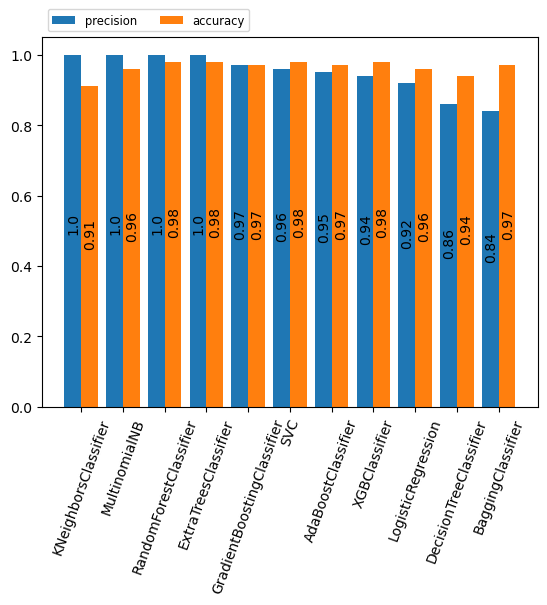

In [81]:
x_axis = np.arange(df_score['model'].shape[0])
plt.bar(x_axis-0.2, df_score['precision'], 0.4,label = 'precision')
for i in range(df_score.shape[0]):
    plt.text(i-0.35, df_score['precision'][i]/2, df_score['precision'][i], rotation = 'vertical')
plt.bar(x_axis+0.2, df_score['accuracy'], 0.4,label = 'accuracy')
for i in range(df_score.shape[0]):
    plt.text(i+0.05, df_score['accuracy'][i]/2, df_score['accuracy'][i], rotation = 'vertical')
plt.xticks(x_axis, df_score['model'], rotation = 70)
plt.legend(ncols = 2, bbox_to_anchor=(0, 1),loc = 'lower left', fontsize='small')
plt.show()

In [98]:
def all_transform(x):
    x2 = transform_text(x)
    return tfidf.transform([x2]).toarray()
    

## 5. Prediction

In [107]:
new_text = all_transform("Congratulations you won 1000 call on this number to get your prize")
new_text

array([[0., 0., 0., ..., 0., 0., 0.]])

In [108]:
etc.predict(new_text)

array([1])